In [ ]:
# FPKM calculation
NOD2reads = 220
length_bases = 4561  
length_kb = length_bases / 1000  # Convert to kilobases
total_reads = 29743387

# FPKM formula
fpkm = (NOD2reads * 1e9) / (length_kb * total_reads)
print(fpkm)
# or simplified:
fpkm = (NOD2reads * 1e9) / (4561 * 29743387)
print(fpkm)

1.6217062359534622
1.621706235953462


Gene	FPKM	Expression Level
--------------------------------------------------
actb2	3282.76	Very High
b2m	959.44	Very High
actb1	337.20	Very High
rpl13a	109.90	Very High
sqstm1	62.73	High
map1lc3b	27.13	High
hif1ab	25.92	High
tbp	21.43	High
map1lc3a	18.33	High
nod2	1.62	Moderate
hif1aa	0.34	Low
il6	0.10	Low
il1b	0.06	Low
gapdh	0.00	Low
tnfa	0.00	Low


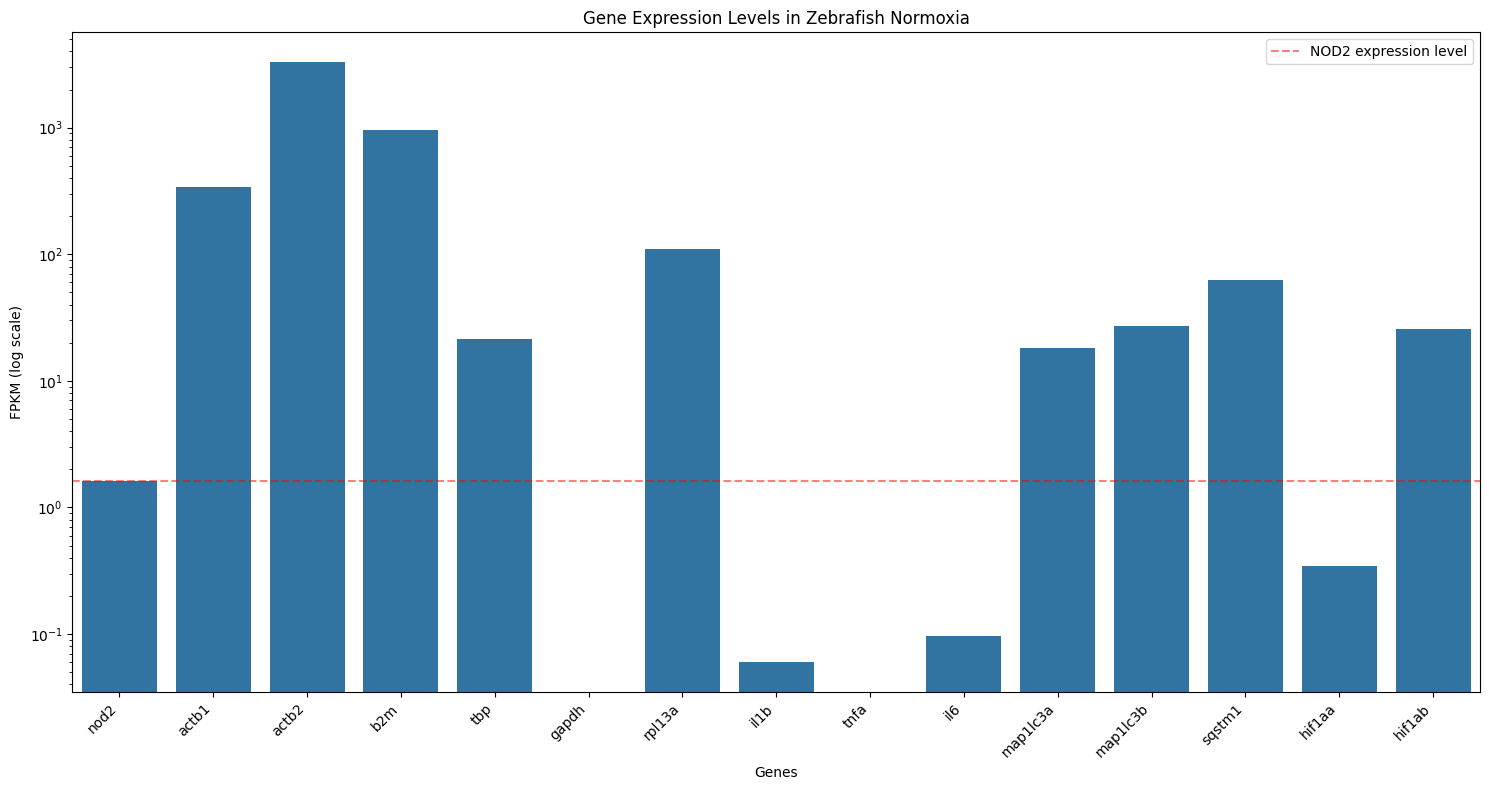

In [3]:
# Total mapped reads from summary file
total_mapped = 29743387

# Dictionary with gene lengths and counts
genes = {
    # Original genes
    'nod2':      {'length': 4561, 'counts': 220},
    'actb1':     {'length': 1730, 'counts': 17351},
    'actb2':     {'length': 1846, 'counts': 180244},
    'b2m':       {'length': 1145, 'counts': 32675},
    'tbp':       {'length': 1729, 'counts': 1102},
    'gapdh':     {'length': 1300, 'counts': 0},
    'rpl13a':    {'length': 763,  'counts': 2494},
    'il1b':      {'length': 2236, 'counts': 4},
    'tnfa':      {'length': 1042, 'counts': 0},
    'il6':       {'length': 696,  'counts': 2},
    
    # New genes
    'map1lc3a':  {'length': 1511, 'counts': 824},    # LC3A
    'map1lc3b':  {'length': 1787, 'counts': 1442},   # LC3B
    'sqstm1':    {'length': 1939, 'counts': 3618},   # P62
    'hif1aa':    {'length': 2154, 'counts': 22},     # HIF1α paralog a
    'hif1ab':    {'length': 4206, 'counts': 3242}    # HIF1α paralog b
}

# Function to calculate FPKM
def calculate_fpkm(counts, length, total_mapped):
    return (counts * 1e9) / (length * total_mapped)

# Calculate FPKM for each gene and store in dictionary
fpkm_values = {}
for gene, data in genes.items():
    fpkm = calculate_fpkm(data['counts'], data['length'], total_mapped)
    fpkm_values[gene] = fpkm

# Sort genes by FPKM value
sorted_genes = sorted(fpkm_values.items(), key=lambda x: x[1], reverse=True)

# Print results in a formatted table
print("Gene\tFPKM\tExpression Level")
print("-" * 50)
for gene, fpkm in sorted_genes:
    level = "Very High" if fpkm > 100 else "High" if fpkm > 10 else "Moderate" if fpkm > 1 else "Low"
    print(f"{gene}\t{fpkm:.2f}\t{level}")

# Create visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Create figure
plt.figure(figsize=(15, 8))

# Create bar plot
sns.barplot(x=list(fpkm_values.keys()), y=list(fpkm_values.values()))

# Customize plot
plt.xticks(rotation=45, ha='right')
plt.yscale('log')  # log scale since values span several orders of magnitude
plt.title('Gene Expression Levels in Zebrafish Normoxia')
plt.xlabel('Genes')
plt.ylabel('FPKM (log scale)')

# Add horizontal line at NOD2's FPKM
plt.axhline(y=fpkm_values['nod2'], color='r', linestyle='--', alpha=0.5, 
           label='NOD2 expression level')

plt.legend()
plt.tight_layout()
plt.show()

In [5]:
import pandas as pd

def create_expression_table():
    # Dictionary with all our gene data
    genes = {
        # Housekeeping genes
        'actb1':     {'length': 1730, 'counts': 17351},
        'actb2':     {'length': 1846, 'counts': 180244},
        'b2m':       {'length': 1145, 'counts': 32675},
        'tbp':       {'length': 1729, 'counts': 1102},
        'gapdh':     {'length': 1300, 'counts': 0},
        'rpl13a':    {'length': 763,  'counts': 2494},
        
        # Target genes
        'nod2':      {'length': 4561, 'counts': 220},
        'map1lc3a':  {'length': 1511, 'counts': 824},
        'map1lc3b':  {'length': 1787, 'counts': 1442},
        'sqstm1':    {'length': 1939, 'counts': 3618},
        'hif1aa':    {'length': 2154, 'counts': 22},
        'hif1ab':    {'length': 4206, 'counts': 3242},
        
        # Inflammatory genes
        'il1b':      {'length': 2236, 'counts': 4},
        'tnfa':      {'length': 1042, 'counts': 0},
        'il6':       {'length': 696,  'counts': 2}
    }
    
    # Total mapped reads
    total_mapped = 29743387
    
    # Create DataFrame
    df = pd.DataFrame.from_dict(genes, orient='index')
    
    # Calculate FPKM
    df['fpkm'] = (df['counts'] * 1e9) / (df['length'] * total_mapped)
    
    # Add expression level category
    df['expression_level'] = pd.cut(df['fpkm'], 
                                  bins=[-float('inf'), 1, 10, 100, float('inf')],
                                  labels=['Low', 'Moderate', 'High', 'Very High'])
    
    # Sort by FPKM
    df = df.sort_values('fpkm', ascending=False)
    
    # Round FPKM to 2 decimal places
    df['fpkm'] = df['fpkm'].round(2)
    
    # Rename columns
    df.columns = ['Length (bp)', 'Raw Counts', 'FPKM', 'Expression Level']
    
    return df

# Create and display the table
expression_table = create_expression_table()
print("\nGene Expression Analysis in Zebrafish Normoxia")
print("=" * 80)
print(expression_table)

# Save to CSV
expression_table.to_csv('zebrafish_gene_expression.csv')


Gene Expression Analysis in Zebrafish Normoxia
          Length (bp)  Raw Counts     FPKM Expression Level
actb2            1846      180244  3282.76        Very High
b2m              1145       32675   959.44        Very High
actb1            1730       17351   337.20        Very High
rpl13a            763        2494   109.90        Very High
sqstm1           1939        3618    62.73             High
map1lc3b         1787        1442    27.13             High
hif1ab           4206        3242    25.92             High
tbp              1729        1102    21.43             High
map1lc3a         1511         824    18.33             High
nod2             4561         220     1.62         Moderate
hif1aa           2154          22     0.34              Low
il6               696           2     0.10              Low
il1b             2236           4     0.06              Low
gapdh            1300           0     0.00              Low
tnfa             1042           0     0.00          